# 🤔 Topic Modeling on Reddit Posts

## 💾 Loading Data

In [30]:
# Displaying full output in Jupyter, not only the last result:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd


# Load the datasets into pandas DataFrames
posts_df = pd.read_csv("Reddit_data.csv")
comments_df = pd.read_csv("Reddit_comments.csv")

posts_df
comments_df


,post_id,subreddit,created_utc,selftext,post_url,post_title,link_falir_text,score,num_comments,upvote_ratio
0,zj2aeu,ChatGPT,1.670782e+09,NaN,https://i.redd.it/nytnro758b5a1.png,"10/10, must-see moment! ChatGPT just did somet...",NaN,20586,300,1.00
1,11yau45,ChatGPT,1.679470e+09,NaN,https://i.redd.it/6hgfcsy2bapa1.jpg,wow it is so smart 💀,Fake,19179,662,0.92
2,11sz0p5,ChatGPT,1.678984e+09,NaN,https://i.redd.it/iq1ukmep66oa1.png,>:(,Funny,16007,199,0.99
3,11p4zg6,ChatGPT,1.678595e+09,NaN,https://i.redd.it/cs0efxmsz9na1.png,Truly pure of heart.,Funny,14031,326,0.96
4,122zfa6,ChatGPT,1.679864e+09,NaN,https://i.redd.it/o7hy9apod5qa1.png,Rap battling ChatGPT is my new favorite sport.,Funny,13318,358,0.98
...,...,...,...,...,...,...,...,...,...,...
990,1278kfu,ChatGPT,1.680233e+09,NaN,https://i.redd.it/caz4upkmb1ra1.jpg,I can’t explain how I feel right now,Funny,273,17,0.96
991,10mqmrz,ChatGPT,1.674841e+09,NaN,https://www.reddit.com/gallery/10mqmrz,The situation is apparently serious…,Funny,271,46,0.94
992,10gjcbu,ChatGPT,1.674178e+09,NaN,https://i.redd.it/bfcwlrjpn3da1.png,Just had an absolutely bizarre response that C...,Interesting,269,43,0.95
993,zc5n8i,ChatGPT,1.670147e+09,NaN,https://i.redd.it/60y7s45sru3a1.png,Don't be a brat,NaN,272,15,1.00


,post_id,comment
0,ztbbiz,In order to prevent multiple repetitive commen...
1,ztbbiz,I've been experimenting with getting ChatGPT t...
2,ztbbiz,Amazing. This absolutely the future of NPCs in...
3,ztbbiz,This is wild! I've adapted your prompt to make...
4,ztbbiz,This is awesome
...,...,...
161574,11nr3h6,That's my girl
161575,11nr3h6,What
161576,11nr3h6,I know what you did
161577,11nr3h6,Not sure I'm following you here


## 🧹 Data Cleaning & Preprocessing

In [31]:
# merging posts and comments together by the post_ids
comments_posts_df = posts_df.merge(comments_df, on = 'post_id', how='left')

# remove rows with missing comments
comments_posts_df = comments_posts_df[~comments_posts_df['comment'].isnull()]

comments_posts_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_falir_text,score,num_comments,upvote_ratio,comment
0,zj2aeu,ChatGPT,1.670782e+09,NaN,https://i.redd.it/nytnro758b5a1.png,"10/10, must-see moment! ChatGPT just did somet...",NaN,20586,300,1.0,"I've been shocked for days now, I don't need c..."
1,zj2aeu,ChatGPT,1.670782e+09,NaN,https://i.redd.it/nytnro758b5a1.png,"10/10, must-see moment! ChatGPT just did somet...",NaN,20586,300,1.0,\r\n\r\nI am so angry right now. I just waste...
2,zj2aeu,ChatGPT,1.670782e+09,NaN,https://i.redd.it/nytnro758b5a1.png,"10/10, must-see moment! ChatGPT just did somet...",NaN,20586,300,1.0,chatgpt karma whoring is here folks! just when...
3,zj2aeu,ChatGPT,1.670782e+09,NaN,https://i.redd.it/nytnro758b5a1.png,"10/10, must-see moment! ChatGPT just did somet...",NaN,20586,300,1.0,"Worked on me, ngl."
4,zj2aeu,ChatGPT,1.670782e+09,NaN,https://i.redd.it/nytnro758b5a1.png,"10/10, must-see moment! ChatGPT just did somet...",NaN,20586,300,1.0,"Certified 10/10, must-see moment. It really di..."
...,...,...,...,...,...,...,...,...,...,...,...
161578,10hrwso,ChatGPT,1.674310e+09,This thread is virtually worthless with all th...,https://www.reddit.com/r/ChatGPT/comments/10hr...,How about posting something useful regarding c...,Other,271,106,0.8,This is absolutely correct. To read this viewp...
161579,10hrwso,ChatGPT,1.674310e+09,This thread is virtually worthless with all th...,https://www.reddit.com/r/ChatGPT/comments/10hr...,How about posting something useful regarding c...,Other,271,106,0.8,If you believe that human entertainment is les...
161580,10hrwso,ChatGPT,1.674310e+09,This thread is virtually worthless with all th...,https://www.reddit.com/r/ChatGPT/comments/10hr...,How about posting something useful regarding c...,Other,271,106,0.8,A marketing team isn't just going to run campa...
161581,10hrwso,ChatGPT,1.674310e+09,This thread is virtually worthless with all th...,https://www.reddit.com/r/ChatGPT/comments/10hr...,How about posting something useful regarding c...,Other,271,106,0.8,I wasn’t exactly saying that you are promoting...


In [32]:
posts_df['post_title']
comments_posts_df['comment']

0      10/10, must-see moment! ChatGPT just did somet...
1                                   wow it is so smart 💀
2                                                    >:(
3                                   Truly pure of heart.
4         Rap battling ChatGPT is my new favorite sport.
                             ...                        
990                 I can’t explain how I feel right now
991                 The situation is apparently serious…
992    Just had an absolutely bizarre response that C...
993                                      Don't be a brat
994    How about posting something useful regarding c...
Name: post_title, Length: 995, dtype: object

0         I've been shocked for days now, I don't need c...
1          \r\n\r\nI am so angry right now. I just waste...
2         chatgpt karma whoring is here folks! just when...
3                                        Worked on me, ngl.
4         Certified 10/10, must-see moment. It really di...
                                ...                        
161578    This is absolutely correct. To read this viewp...
161579    If you believe that human entertainment is les...
161580    A marketing team isn't just going to run campa...
161581    I wasn’t exactly saying that you are promoting...
161582    My company has 20,000 parts in inventory that ...
Name: comment, Length: 161576, dtype: object

In [18]:
posts_df.post_title[1]

comments_posts_df.comment[1]

'wow it is so smart 💀'

" \r\n\r\nI am so angry right now. I just wasted my time reading a post on this sub that had a clickbait title, and it was all because of ChatGPT. I can't believe that this machine learning model was able to trick me into thinking that the post was interesting, when it was actually just a bunch of meaningless garbage.\r\n\r\nI am so sick and tired of ChatGPT and its ability to generate fake titles and content that is designed to trick people into clicking on them. This is not the first time that ChatGPT has fooled me, and I am sure it won't be the last. But I am not going to stand for it anymore.\r\n\r\nI demand that the moderators of this sub take action against ChatGPT and its creators. We need to put a stop to this trickery, and we need to hold ChatGPT accountable for the harm it is causing to this community. I am tired of being deceived by this machine, and I will not stand for it any longer.\r\n\r\nSo if you are reading this, ChatGPT, know that you have made a mistake. You have un

In [33]:
# Adding two columns of number of words in each comment and the length of the comment.

comments_posts_df['word_count'] = comments_posts_df['comment'].apply(lambda x : len(str(x).split(" ")))
comments_posts_df['length'] = comments_posts_df['comment'].str.len()
comments_posts_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_falir_text,score,num_comments,upvote_ratio,comment,word_count,length
0,zj2aeu,ChatGPT,1.670782e+09,NaN,https://i.redd.it/nytnro758b5a1.png,"10/10, must-see moment! ChatGPT just did somet...",NaN,20586,300,1.0,"I've been shocked for days now, I don't need c...",10,55
1,zj2aeu,ChatGPT,1.670782e+09,NaN,https://i.redd.it/nytnro758b5a1.png,"10/10, must-see moment! ChatGPT just did somet...",NaN,20586,300,1.0,\r\n\r\nI am so angry right now. I just waste...,229,1212
2,zj2aeu,ChatGPT,1.670782e+09,NaN,https://i.redd.it/nytnro758b5a1.png,"10/10, must-see moment! ChatGPT just did somet...",NaN,20586,300,1.0,chatgpt karma whoring is here folks! just when...,23,131
3,zj2aeu,ChatGPT,1.670782e+09,NaN,https://i.redd.it/nytnro758b5a1.png,"10/10, must-see moment! ChatGPT just did somet...",NaN,20586,300,1.0,"Worked on me, ngl.",4,18
4,zj2aeu,ChatGPT,1.670782e+09,NaN,https://i.redd.it/nytnro758b5a1.png,"10/10, must-see moment! ChatGPT just did somet...",NaN,20586,300,1.0,"Certified 10/10, must-see moment. It really di...",12,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,10hrwso,ChatGPT,1.674310e+09,This thread is virtually worthless with all th...,https://www.reddit.com/r/ChatGPT/comments/10hr...,How about posting something useful regarding c...,Other,271,106,0.8,This is absolutely correct. To read this viewp...,23,123
161579,10hrwso,ChatGPT,1.674310e+09,This thread is virtually worthless with all th...,https://www.reddit.com/r/ChatGPT/comments/10hr...,How about posting something useful regarding c...,Other,271,106,0.8,If you believe that human entertainment is les...,149,866
161580,10hrwso,ChatGPT,1.674310e+09,This thread is virtually worthless with all th...,https://www.reddit.com/r/ChatGPT/comments/10hr...,How about posting something useful regarding c...,Other,271,106,0.8,A marketing team isn't just going to run campa...,131,734
161581,10hrwso,ChatGPT,1.674310e+09,This thread is virtually worthless with all th...,https://www.reddit.com/r/ChatGPT/comments/10hr...,How about posting something useful regarding c...,Other,271,106,0.8,I wasn’t exactly saying that you are promoting...,52,314


In [34]:
# Showing all the comments with less than 8 words
comments_posts_df[comments_posts_df["word_count"] < 8 ]

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_falir_text,score,num_comments,upvote_ratio,comment,word_count,length
3,zj2aeu,ChatGPT,1.670782e+09,NaN,https://i.redd.it/nytnro758b5a1.png,"10/10, must-see moment! ChatGPT just did somet...",NaN,20586,300,1.0,"Worked on me, ngl.",4,18
9,zj2aeu,ChatGPT,1.670782e+09,NaN,https://i.redd.it/nytnro758b5a1.png,"10/10, must-see moment! ChatGPT just did somet...",NaN,20586,300,1.0,Inception)),1,11
12,zj2aeu,ChatGPT,1.670782e+09,NaN,https://i.redd.it/nytnro758b5a1.png,"10/10, must-see moment! ChatGPT just did somet...",NaN,20586,300,1.0,Thanks block option.,3,20
13,zj2aeu,ChatGPT,1.670782e+09,NaN,https://i.redd.it/nytnro758b5a1.png,"10/10, must-see moment! ChatGPT just did somet...",NaN,20586,300,1.0,Shit it worked on me,5,20
14,zj2aeu,ChatGPT,1.670782e+09,NaN,https://i.redd.it/nytnro758b5a1.png,"10/10, must-see moment! ChatGPT just did somet...",NaN,20586,300,1.0,God damnit it worked.,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161560,10hrwso,ChatGPT,1.674310e+09,This thread is virtually worthless with all th...,https://www.reddit.com/r/ChatGPT/comments/10hr...,How about posting something useful regarding c...,Other,271,106,0.8,[removed],1,9
161563,10hrwso,ChatGPT,1.674310e+09,This thread is virtually worthless with all th...,https://www.reddit.com/r/ChatGPT/comments/10hr...,How about posting something useful regarding c...,Other,271,106,0.8,Very Possibly! Try it!!!!,4,25
161564,10hrwso,ChatGPT,1.674310e+09,This thread is virtually worthless with all th...,https://www.reddit.com/r/ChatGPT/comments/10hr...,How about posting something useful regarding c...,Other,271,106,0.8,Mornington Crescent\n\nhttps://en.wikipedia.or...,2,77
161566,10hrwso,ChatGPT,1.674310e+09,This thread is virtually worthless with all th...,https://www.reddit.com/r/ChatGPT/comments/10hr...,How about posting something useful regarding c...,Other,271,106,0.8,\*based on delusion,3,19


In [35]:
# Droping the rows with word length smaller than 8

drop_index = comments_posts_df[comments_posts_df["word_count"] < 8 ].index
comments_posts_df.drop(drop_index, inplace= True)
comments_posts_df.shape
comments_posts_df

(119728, 13)

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_falir_text,score,num_comments,upvote_ratio,comment,word_count,length
0,zj2aeu,ChatGPT,1.670782e+09,NaN,https://i.redd.it/nytnro758b5a1.png,"10/10, must-see moment! ChatGPT just did somet...",NaN,20586,300,1.0,"I've been shocked for days now, I don't need c...",10,55
1,zj2aeu,ChatGPT,1.670782e+09,NaN,https://i.redd.it/nytnro758b5a1.png,"10/10, must-see moment! ChatGPT just did somet...",NaN,20586,300,1.0,\r\n\r\nI am so angry right now. I just waste...,229,1212
2,zj2aeu,ChatGPT,1.670782e+09,NaN,https://i.redd.it/nytnro758b5a1.png,"10/10, must-see moment! ChatGPT just did somet...",NaN,20586,300,1.0,chatgpt karma whoring is here folks! just when...,23,131
4,zj2aeu,ChatGPT,1.670782e+09,NaN,https://i.redd.it/nytnro758b5a1.png,"10/10, must-see moment! ChatGPT just did somet...",NaN,20586,300,1.0,"Certified 10/10, must-see moment. It really di...",12,68
5,zj2aeu,ChatGPT,1.670782e+09,NaN,https://i.redd.it/nytnro758b5a1.png,"10/10, must-see moment! ChatGPT just did somet...",NaN,20586,300,1.0,"People on Reddit seek the karma and the fame,\...",115,687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,10hrwso,ChatGPT,1.674310e+09,This thread is virtually worthless with all th...,https://www.reddit.com/r/ChatGPT/comments/10hr...,How about posting something useful regarding c...,Other,271,106,0.8,This is absolutely correct. To read this viewp...,23,123
161579,10hrwso,ChatGPT,1.674310e+09,This thread is virtually worthless with all th...,https://www.reddit.com/r/ChatGPT/comments/10hr...,How about posting something useful regarding c...,Other,271,106,0.8,If you believe that human entertainment is les...,149,866
161580,10hrwso,ChatGPT,1.674310e+09,This thread is virtually worthless with all th...,https://www.reddit.com/r/ChatGPT/comments/10hr...,How about posting something useful regarding c...,Other,271,106,0.8,A marketing team isn't just going to run campa...,131,734
161581,10hrwso,ChatGPT,1.674310e+09,This thread is virtually worthless with all th...,https://www.reddit.com/r/ChatGPT/comments/10hr...,How about posting something useful regarding c...,Other,271,106,0.8,I wasn’t exactly saying that you are promoting...,52,314


In [36]:
post_titles = posts_df['post_title'].to_list()
post_comments = comments_posts_df['comment'].to_list()

print("The first post title in the dataset📝:\n",post_titles[0])
print("\n")
print("The first comment in the dataset✍🏼:\n",post_comments[0])

The first post title in the dataset📝:
 10/10, must-see moment! ChatGPT just did something that will shock you to your core!


The first comment in the dataset✍🏼:
 I've been shocked for days now, I don't need clickbait.


In [37]:
# Data Cleaning:
import string
import re
from langdetect import detect #to get rid of non-english titles
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
from nltk.corpus import words #we can also use words.words() method to get rid of non-english articles
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from gensim.utils import simple_preprocess

#Visualization:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Topic Modeling:
import gensim
# simple_process tokenizes a piece of text into individual words and removes any punctuation marks
from gensim.utils import simple_preprocess
#to work with textual data:
import gensim.corpora as corpora 
# if you don't want to write the preprocessing code:
# from gensim.utils import simple_preprocess
from gensim.models import LdaModel, CoherenceModel
# to visualize lda models in python:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

print("Successully imported all libraries.")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samaneh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /Users/samaneh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package words to /Users/samaneh/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

Successully imported all libraries.


In [38]:
# perform preprocessing and data cleaning on the article titles and snippets

stop_words = stopwords.words('english')
custom_stop_words = ['chatgpt']
stop_words = stop_words + custom_stop_words
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('english') #we decided not to use it
 
    
def lemmatize(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')


def preprocess(text):
    text = text.replace('\n', '') #remove \n from comments
    text = text.replace('\r', '') #remove \r from comments
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = text.lower()  # convert to lowercase
    tokens = text.split()
    
    result = []
    for token in simple_preprocess(text):
        if token not in stop_words and len(token) > 3:
            result.append(lemmatize(token))
            
    return result



cleaned_titles = [preprocess(title) for title in post_titles]
cleaned_comments = [preprocess(comment) for comment in post_comments]


print("First Post Title in the Dataset:",post_titles[0])
print("\n")
print("Cleaned Version:",cleaned_titles[0])
print("\n")
print("First Comment in the Dataset:",post_comments[0])
print("\n")
print("Cleaned Version:",cleaned_comments[0])

First Post Title in the Dataset: 10/10, must-see moment! ChatGPT just did something that will shock you to your core!


Cleaned Version: ['mustsee', 'moment', 'something', 'shock', 'core']


First Comment in the Dataset: I've been shocked for days now, I don't need clickbait.


Cleaned Version: ['shock', 'days', 'dont', 'need', 'clickbait']


## 💡 Creating LDA Topic Model for Post Titles

In [39]:
# create a dictionary
id2word = corpora.Dictionary(cleaned_titles)
# create a BoW
corpus = [id2word.doc2bow(cleaned_title) for cleaned_title in cleaned_titles]

### Finding the Optimal Number of Topics

In [57]:
def compute_coherence_values(dictionary, corpus, texts, limit, start =2, step=1):
    
    """
    compute c_v coherence for various number of topics
    
    parameters:
    -----------
    dictionary: Gensim dictionary
    corpus: Gensim corpus
    texts: list of input texts
    limit: max num of topics
    
    
    returns:
    --------
    model_list: list of LDA topic models
    coherence values: coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit,step):
        model = gensim.models.ldamodel.LdaModel(corpus = corpus, num_topics = num_topics, random_state = 100, 
                                               chunksize = 200, passes =10, per_word_topics = True, id2word = id2word)
        
        model_list.append(model)
        coherencemodel1 = CoherenceModel(model= model, texts= texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel1.get_coherence())
        
        
    return model_list, coherence_values
    
    

#### Creating 10 LDA models with different number of topics and get the coherence value for each topic model

In [58]:
model_list, coherence_values = compute_coherence_values(dictionary = id2word, corpus = corpus, texts = cleaned_titles, start=2, limit = 10, step = 1)
                                                                                        


#### Visualizing the coherence score for different number of topics

Text(0.5, 0, 'Number of Topics')

Text(0, 0.5, 'Coherence Score')

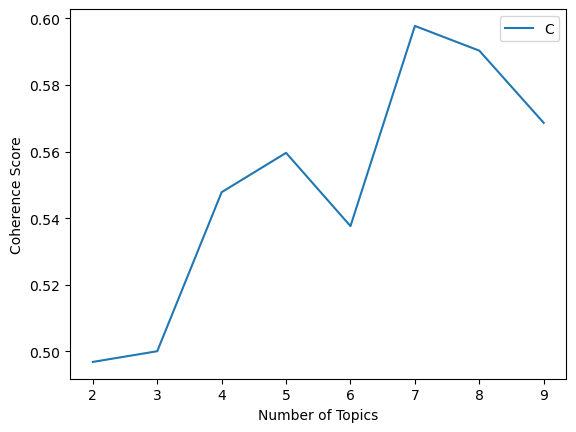

In [59]:
# show graph

limit = 10
start = 2
step = 1

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.legend(("Coherence_Values"), loc = 'best')
plt.show()

In [60]:
# print the coherence scores

for m, cv in zip(x,coherence_values):
    print("Number of Topics =", m, " has Coherence Value of", round(cv,4))

Number of Topics = 2  has Coherence Value of 0.4968
Number of Topics = 3  has Coherence Value of 0.5
Number of Topics = 4  has Coherence Value of 0.5478
Number of Topics = 5  has Coherence Value of 0.5596
Number of Topics = 6  has Coherence Value of 0.5376
Number of Topics = 7  has Coherence Value of 0.5978
Number of Topics = 8  has Coherence Value of 0.5903
Number of Topics = 9  has Coherence Value of 0.5686


In [61]:
# supporting function
def compute_coherence_vals(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=7,
                                               random_state=100,
                                               chunksize=200,
                                               passes=10,
                                               alpha=a,
                                               eta=b,
                                               per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=cleaned_titles, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()
    
    
    

In [62]:
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 10
step_size = 1
topics_range = range(min_topics,max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01,1,0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

In [63]:
# Validation sets

num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), corpus]

corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                'Topics': [],
                'Alpha': [],
                'Beta': [],
                'Coherence': []
                }

if 1 ==1:
    pbar = tqdm.tqdm(total = 540)
    
    for i in range(len(corpus_sets)):
        #iterate through number of topics
        for k in topics_range:
            #iterate through alpha values
            for a in alpha:
                #iterate through beta values
                for b in beta:
                    #get the coherence score for the given parameters
                    cv = compute_coherence_vals(corpus=corpus_sets[i], dictionary=id2word,
                                               k=k, a=a, b=b)
                    
                    
                    #save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_turning_results.csv', index=False)
    pbar.close()



  0%|                                                   | 0/540 [01:50<?, ?it/s]

  0%|                                           | 1/540 [00:02<23:10,  2.58s/it]

True


  0%|▏                                          | 2/540 [00:05<23:36,  2.63s/it]

True


  1%|▏                                          | 3/540 [00:08<24:09,  2.70s/it]

True


  1%|▎                                          | 4/540 [00:10<24:18,  2.72s/it]

True


  1%|▍                                          | 5/540 [00:13<23:52,  2.68s/it]

True


  1%|▍                                          | 6/540 [00:15<23:13,  2.61s/it]

True


  1%|▌                                          | 7/540 [00:18<23:30,  2.65s/it]

True


  1%|▋                                          | 8/540 [00:21<24:21,  2.75s/it]

True


  2%|▋                                          | 9/540 [00:24<25:26,  2.87s/it]

True


  2%|▊                                         | 10/540 [00:27<24:43,  2.80s/it]

True


  2%|▊                                         | 11/540 [00:29<23:51,  2.71s/it]

True


  2%|▉                                         | 12/540 [00:32<23:55,  2.72s/it]

True


  2%|█                                         | 13/540 [00:35<24:22,  2.78s/it]

True


  3%|█                                         | 14/540 [00:38<25:06,  2.86s/it]

True


  3%|█▏                                        | 15/540 [00:41<24:21,  2.78s/it]

True


  3%|█▏                                        | 16/540 [00:43<23:29,  2.69s/it]

True


  3%|█▎                                        | 17/540 [00:46<23:28,  2.69s/it]

True


  3%|█▍                                        | 18/540 [00:49<23:50,  2.74s/it]

True


  4%|█▍                                        | 19/540 [00:52<24:07,  2.78s/it]

True


  4%|█▌                                        | 20/540 [00:54<23:52,  2.75s/it]

True


  4%|█▋                                        | 21/540 [00:57<23:29,  2.71s/it]

True


  4%|█▋                                        | 22/540 [01:00<23:38,  2.74s/it]

True


  4%|█▊                                        | 23/540 [01:03<24:02,  2.79s/it]

True


  4%|█▊                                        | 24/540 [01:05<24:21,  2.83s/it]

True


  5%|█▉                                        | 25/540 [01:08<24:03,  2.80s/it]

True


  5%|██                                        | 26/540 [01:11<23:35,  2.75s/it]

True


  5%|██                                        | 27/540 [01:14<23:46,  2.78s/it]

True


  5%|██▏                                       | 28/540 [01:17<24:07,  2.83s/it]

True


  5%|██▎                                       | 29/540 [01:20<24:32,  2.88s/it]

True


  6%|██▎                                       | 30/540 [01:22<24:07,  2.84s/it]

True


  6%|██▍                                       | 31/540 [01:25<23:39,  2.79s/it]

True


  6%|██▍                                       | 32/540 [01:28<23:43,  2.80s/it]

True


  6%|██▌                                       | 33/540 [01:31<24:05,  2.85s/it]

True


  6%|██▋                                       | 34/540 [01:34<24:24,  2.89s/it]

True


  6%|██▋                                       | 35/540 [01:37<24:01,  2.85s/it]

True


  7%|██▊                                       | 36/540 [01:39<23:38,  2.81s/it]

True


  7%|██▉                                       | 37/540 [01:42<24:06,  2.88s/it]

True


  7%|██▉                                       | 38/540 [01:46<26:28,  3.16s/it]

True


  7%|███                                       | 39/540 [01:50<27:03,  3.24s/it]

True


  7%|███                                       | 40/540 [01:53<26:11,  3.14s/it]

True


  8%|███▏                                      | 41/540 [01:55<24:54,  2.99s/it]

True


  8%|███▎                                      | 42/540 [01:58<24:56,  3.01s/it]

True


  8%|███▎                                      | 43/540 [02:01<25:16,  3.05s/it]

True


  8%|███▍                                      | 44/540 [02:05<26:01,  3.15s/it]

True


  8%|███▌                                      | 45/540 [02:08<25:21,  3.07s/it]

True


  9%|███▌                                      | 46/540 [02:10<24:27,  2.97s/it]

True


  9%|███▋                                      | 47/540 [02:13<24:25,  2.97s/it]

True


  9%|███▋                                      | 48/540 [02:16<24:36,  3.00s/it]

True


  9%|███▊                                      | 49/540 [02:20<24:56,  3.05s/it]

True


  9%|███▉                                      | 50/540 [02:22<24:29,  3.00s/it]

True


  9%|███▉                                      | 51/540 [02:25<24:05,  2.96s/it]

True


 10%|████                                      | 52/540 [02:28<24:02,  2.96s/it]

True


 10%|████                                      | 53/540 [02:31<24:19,  3.00s/it]

True


 10%|████▏                                     | 54/540 [02:35<24:41,  3.05s/it]

True


 10%|████▎                                     | 55/540 [02:37<24:14,  3.00s/it]

True


 10%|████▎                                     | 56/540 [02:40<23:47,  2.95s/it]

True


 11%|████▍                                     | 57/540 [02:43<23:47,  2.96s/it]

True


 11%|████▌                                     | 58/540 [02:46<24:09,  3.01s/it]

True


 11%|████▌                                     | 59/540 [02:50<24:39,  3.08s/it]

True


 11%|████▋                                     | 60/540 [02:52<24:12,  3.03s/it]

True


 11%|████▋                                     | 61/540 [02:55<23:35,  2.95s/it]

True


 11%|████▊                                     | 62/540 [02:58<23:40,  2.97s/it]

True


 12%|████▉                                     | 63/540 [03:01<23:48,  2.99s/it]

True


 12%|████▉                                     | 64/540 [03:04<24:00,  3.03s/it]

True


 12%|█████                                     | 65/540 [03:07<23:37,  2.98s/it]

True


 12%|█████▏                                    | 66/540 [03:10<23:02,  2.92s/it]

True


 12%|█████▏                                    | 67/540 [03:13<23:33,  2.99s/it]

True


 13%|█████▎                                    | 68/540 [03:17<24:20,  3.10s/it]

True


 13%|█████▎                                    | 69/540 [03:20<25:04,  3.19s/it]

True


 13%|█████▍                                    | 70/540 [03:23<24:37,  3.14s/it]

True


 13%|█████▌                                    | 71/540 [03:26<23:46,  3.04s/it]

True


 13%|█████▌                                    | 72/540 [03:29<23:47,  3.05s/it]

True


 14%|█████▋                                    | 73/540 [03:32<24:19,  3.12s/it]

True


 14%|█████▊                                    | 74/540 [03:36<24:58,  3.22s/it]

True


 14%|█████▊                                    | 75/540 [03:39<24:22,  3.14s/it]

True


 14%|█████▉                                    | 76/540 [03:41<23:27,  3.03s/it]

True


 14%|█████▉                                    | 77/540 [03:44<23:26,  3.04s/it]

True


 14%|██████                                    | 78/540 [03:48<23:33,  3.06s/it]

True


 15%|██████▏                                   | 79/540 [03:51<23:41,  3.08s/it]

True


 15%|██████▏                                   | 80/540 [03:54<23:43,  3.09s/it]

True


 15%|██████▎                                   | 81/540 [03:57<23:09,  3.03s/it]

True


 15%|██████▍                                   | 82/540 [04:00<23:02,  3.02s/it]

True


 15%|██████▍                                   | 83/540 [04:03<23:13,  3.05s/it]

True


 16%|██████▌                                   | 84/540 [04:06<23:26,  3.09s/it]

True


 16%|██████▌                                   | 85/540 [04:09<23:07,  3.05s/it]

True


 16%|██████▋                                   | 86/540 [04:12<22:44,  3.01s/it]

True


 16%|██████▊                                   | 87/540 [04:15<22:46,  3.02s/it]

True


 16%|██████▊                                   | 88/540 [04:18<22:53,  3.04s/it]

True


 16%|██████▉                                   | 89/540 [04:21<23:18,  3.10s/it]

True


 17%|███████                                   | 90/540 [04:24<23:13,  3.10s/it]

True


 17%|███████                                   | 91/540 [04:27<22:57,  3.07s/it]

True


 17%|███████▏                                  | 92/540 [04:30<22:55,  3.07s/it]

True


 17%|███████▏                                  | 93/540 [04:33<22:54,  3.07s/it]

True


 17%|███████▎                                  | 94/540 [04:37<23:02,  3.10s/it]

True


 18%|███████▍                                  | 95/540 [04:40<22:36,  3.05s/it]

True


 18%|███████▍                                  | 96/540 [04:42<22:14,  3.01s/it]

True


 18%|███████▌                                  | 97/540 [04:46<22:30,  3.05s/it]

True


 18%|███████▌                                  | 98/540 [04:49<23:08,  3.14s/it]

True


 18%|███████▋                                  | 99/540 [04:52<23:51,  3.25s/it]

True


 19%|███████▌                                 | 100/540 [04:55<23:16,  3.17s/it]

True


 19%|███████▋                                 | 101/540 [04:58<22:27,  3.07s/it]

True


 19%|███████▋                                 | 102/540 [05:01<22:25,  3.07s/it]

True


 19%|███████▊                                 | 103/540 [05:05<22:57,  3.15s/it]

True


 19%|███████▉                                 | 104/540 [05:08<23:30,  3.23s/it]

True


 19%|███████▉                                 | 105/540 [05:11<22:50,  3.15s/it]

True


 20%|████████                                 | 106/540 [05:14<22:04,  3.05s/it]

True


 20%|████████                                 | 107/540 [05:17<22:03,  3.06s/it]

True


 20%|████████▏                                | 108/540 [05:20<22:17,  3.09s/it]

True


 20%|████████▎                                | 109/540 [05:23<22:23,  3.12s/it]

True


 20%|████████▎                                | 110/540 [05:26<21:58,  3.07s/it]

True


 21%|████████▍                                | 111/540 [05:29<21:30,  3.01s/it]

True


 21%|████████▌                                | 112/540 [05:32<21:33,  3.02s/it]

True


 21%|████████▌                                | 113/540 [05:35<21:45,  3.06s/it]

True


 21%|████████▋                                | 114/540 [05:39<22:01,  3.10s/it]

True


 21%|████████▋                                | 115/540 [05:42<21:43,  3.07s/it]

True


 21%|████████▊                                | 116/540 [05:44<21:14,  3.01s/it]

True


 22%|████████▉                                | 117/540 [05:47<21:22,  3.03s/it]

True


 22%|████████▉                                | 118/540 [05:51<21:38,  3.08s/it]

True


 22%|█████████                                | 119/540 [05:54<21:55,  3.12s/it]

True


 22%|█████████                                | 120/540 [05:57<21:31,  3.08s/it]

True


 22%|█████████▏                               | 121/540 [06:00<21:00,  3.01s/it]

True


 23%|█████████▎                               | 122/540 [06:03<21:00,  3.02s/it]

True


 23%|█████████▎                               | 123/540 [06:06<21:16,  3.06s/it]

True


 23%|█████████▍                               | 124/540 [06:09<21:33,  3.11s/it]

True


 23%|█████████▍                               | 125/540 [06:12<21:05,  3.05s/it]

True


 23%|█████████▌                               | 126/540 [06:15<20:40,  3.00s/it]

True


 24%|█████████▋                               | 127/540 [06:18<21:00,  3.05s/it]

True


 24%|█████████▋                               | 128/540 [06:21<21:24,  3.12s/it]

True


 24%|█████████▊                               | 129/540 [06:25<22:00,  3.21s/it]

True


 24%|█████████▊                               | 130/540 [06:28<21:36,  3.16s/it]

True


 24%|█████████▉                               | 131/540 [06:31<20:49,  3.06s/it]

True


 24%|██████████                               | 132/540 [06:34<20:59,  3.09s/it]

True


 25%|██████████                               | 133/540 [06:37<21:24,  3.16s/it]

True


 25%|██████████▏                              | 134/540 [06:40<21:45,  3.22s/it]

True


 25%|██████████▎                              | 135/540 [06:44<21:19,  3.16s/it]

True


 25%|██████████▎                              | 136/540 [06:46<20:34,  3.06s/it]

True


 25%|██████████▍                              | 137/540 [06:50<20:46,  3.09s/it]

True


 26%|██████████▍                              | 138/540 [06:53<20:49,  3.11s/it]

True


 26%|██████████▌                              | 139/540 [06:56<20:57,  3.14s/it]

True


 26%|██████████▋                              | 140/540 [06:59<20:38,  3.10s/it]

True


 26%|██████████▋                              | 141/540 [07:02<20:14,  3.04s/it]

True


 26%|██████████▊                              | 142/540 [07:05<20:23,  3.07s/it]

True


 26%|██████████▊                              | 143/540 [07:08<20:43,  3.13s/it]

True


 27%|██████████▉                              | 144/540 [07:11<20:52,  3.16s/it]

True


 27%|███████████                              | 145/540 [07:14<20:35,  3.13s/it]

True


 27%|███████████                              | 146/540 [07:17<20:07,  3.06s/it]

True


 27%|███████████▏                             | 147/540 [07:20<20:04,  3.07s/it]

True


 27%|███████████▏                             | 148/540 [07:24<20:10,  3.09s/it]

True


 28%|███████████▎                             | 149/540 [07:27<20:25,  3.13s/it]

True


 28%|███████████▍                             | 150/540 [07:30<20:16,  3.12s/it]

True


 28%|███████████▍                             | 151/540 [07:33<19:54,  3.07s/it]

True


 28%|███████████▌                             | 152/540 [07:36<19:45,  3.05s/it]

True


 28%|███████████▌                             | 153/540 [07:39<19:43,  3.06s/it]

True


 29%|███████████▋                             | 154/540 [07:42<20:00,  3.11s/it]

True


 29%|███████████▊                             | 155/540 [07:45<19:37,  3.06s/it]

True


 29%|███████████▊                             | 156/540 [07:48<19:21,  3.03s/it]

True


 29%|███████████▉                             | 157/540 [07:51<19:39,  3.08s/it]

True


 29%|███████████▉                             | 158/540 [07:55<20:10,  3.17s/it]

True


 29%|████████████                             | 159/540 [07:58<20:45,  3.27s/it]

True


 30%|████████████▏                            | 160/540 [08:01<20:19,  3.21s/it]

True


 30%|████████████▏                            | 161/540 [08:04<19:37,  3.11s/it]

True


 30%|████████████▎                            | 162/540 [08:07<19:40,  3.12s/it]

True


 30%|████████████▍                            | 163/540 [08:11<19:57,  3.18s/it]

True


 30%|████████████▍                            | 164/540 [08:14<20:23,  3.25s/it]

True


 31%|████████████▌                            | 165/540 [08:17<19:49,  3.17s/it]

True


 31%|████████████▌                            | 166/540 [08:20<19:15,  3.09s/it]

True


 31%|████████████▋                            | 167/540 [08:23<19:23,  3.12s/it]

True


 31%|████████████▊                            | 168/540 [08:26<19:30,  3.15s/it]

True


 31%|████████████▊                            | 169/540 [08:29<19:30,  3.16s/it]

True


 31%|████████████▉                            | 170/540 [08:32<19:02,  3.09s/it]

True


 32%|████████████▉                            | 171/540 [08:35<18:41,  3.04s/it]

True


 32%|█████████████                            | 172/540 [08:38<18:42,  3.05s/it]

True


 32%|█████████████▏                           | 173/540 [08:42<18:54,  3.09s/it]

True


 32%|█████████████▏                           | 174/540 [08:45<19:11,  3.14s/it]

True


 32%|█████████████▎                           | 175/540 [08:48<18:52,  3.10s/it]

True


 33%|█████████████▎                           | 176/540 [08:51<18:24,  3.04s/it]

True


 33%|█████████████▍                           | 177/540 [08:54<18:29,  3.06s/it]

True


 33%|█████████████▌                           | 178/540 [08:57<18:52,  3.13s/it]

True


 33%|█████████████▌                           | 179/540 [09:00<19:06,  3.18s/it]

True


 33%|█████████████▋                           | 180/540 [09:03<18:47,  3.13s/it]

True


 34%|█████████████▋                           | 181/540 [09:06<18:16,  3.05s/it]

True


 34%|█████████████▊                           | 182/540 [09:10<18:26,  3.09s/it]

True


 34%|█████████████▉                           | 183/540 [09:13<18:29,  3.11s/it]

True


 34%|█████████████▉                           | 184/540 [09:16<18:37,  3.14s/it]

True


 34%|██████████████                           | 185/540 [09:19<18:20,  3.10s/it]

True


 34%|██████████████                           | 186/540 [09:22<17:53,  3.03s/it]

True


 35%|██████████████▏                          | 187/540 [09:25<18:08,  3.08s/it]

True


 35%|██████████████▎                          | 188/540 [09:28<18:45,  3.20s/it]

True


 35%|██████████████▎                          | 189/540 [09:32<19:18,  3.30s/it]

True


 35%|██████████████▍                          | 190/540 [09:35<18:50,  3.23s/it]

True


 35%|██████████████▌                          | 191/540 [09:38<18:10,  3.13s/it]

True


 36%|██████████████▌                          | 192/540 [09:41<18:08,  3.13s/it]

True


 36%|██████████████▋                          | 193/540 [09:44<18:30,  3.20s/it]

True


 36%|██████████████▋                          | 194/540 [09:48<18:53,  3.28s/it]

True


 36%|██████████████▊                          | 195/540 [09:51<18:20,  3.19s/it]

True


 36%|██████████████▉                          | 196/540 [09:54<17:48,  3.11s/it]

True


 36%|██████████████▉                          | 197/540 [09:57<17:42,  3.10s/it]

True


 37%|███████████████                          | 198/540 [10:00<17:51,  3.13s/it]

True


 37%|███████████████                          | 199/540 [10:03<17:55,  3.15s/it]

True


 37%|███████████████▏                         | 200/540 [10:06<17:37,  3.11s/it]

True


 37%|███████████████▎                         | 201/540 [10:09<17:15,  3.05s/it]

True


 37%|███████████████▎                         | 202/540 [10:12<17:22,  3.08s/it]

True


 38%|███████████████▍                         | 203/540 [10:16<18:13,  3.25s/it]

True


 38%|███████████████▍                         | 204/540 [10:19<18:20,  3.27s/it]

True


 38%|███████████████▌                         | 205/540 [10:22<17:51,  3.20s/it]

True


 38%|███████████████▋                         | 206/540 [10:25<17:15,  3.10s/it]

True


 38%|███████████████▋                         | 207/540 [10:28<17:11,  3.10s/it]

True


 39%|███████████████▊                         | 208/540 [10:32<17:22,  3.14s/it]

True


 39%|███████████████▊                         | 209/540 [10:35<17:41,  3.21s/it]

True


 39%|███████████████▉                         | 210/540 [10:38<17:20,  3.15s/it]

True


 39%|████████████████                         | 211/540 [10:41<16:56,  3.09s/it]

True


 39%|████████████████                         | 212/540 [10:44<16:49,  3.08s/it]

True


 39%|████████████████▏                        | 213/540 [10:47<16:58,  3.11s/it]

True


 40%|████████████████▏                        | 214/540 [10:50<17:02,  3.14s/it]

True


 40%|████████████████▎                        | 215/540 [10:53<16:41,  3.08s/it]

True


 40%|████████████████▍                        | 216/540 [10:56<16:18,  3.02s/it]

True


 40%|████████████████▍                        | 217/540 [10:59<16:34,  3.08s/it]

True


 40%|████████████████▌                        | 218/540 [11:03<16:59,  3.17s/it]

True


 41%|████████████████▋                        | 219/540 [11:06<17:38,  3.30s/it]

True


 41%|████████████████▋                        | 220/540 [11:09<17:17,  3.24s/it]

True


 41%|████████████████▊                        | 221/540 [11:12<16:42,  3.14s/it]

True


 41%|████████████████▊                        | 222/540 [11:15<16:40,  3.15s/it]

True


 41%|████████████████▉                        | 223/540 [11:19<16:53,  3.20s/it]

True


 41%|█████████████████                        | 224/540 [11:22<17:12,  3.27s/it]

True


 42%|█████████████████                        | 225/540 [11:25<16:43,  3.19s/it]

True


 42%|█████████████████▏                       | 226/540 [11:28<16:11,  3.09s/it]

True


 42%|█████████████████▏                       | 227/540 [11:31<16:10,  3.10s/it]

True


 42%|█████████████████▎                       | 228/540 [11:35<16:24,  3.15s/it]

True


 42%|█████████████████▍                       | 229/540 [11:38<16:23,  3.16s/it]

True


 43%|█████████████████▍                       | 230/540 [11:41<16:11,  3.13s/it]

True


 43%|█████████████████▌                       | 231/540 [11:44<15:54,  3.09s/it]

True


 43%|█████████████████▌                       | 232/540 [11:47<15:47,  3.08s/it]

True


 43%|█████████████████▋                       | 233/540 [11:50<16:06,  3.15s/it]

True


 43%|█████████████████▊                       | 234/540 [11:54<16:26,  3.22s/it]

True


 44%|█████████████████▊                       | 235/540 [11:57<16:04,  3.16s/it]

True


 44%|█████████████████▉                       | 236/540 [11:59<15:37,  3.08s/it]

True


 44%|█████████████████▉                       | 237/540 [12:03<15:33,  3.08s/it]

True


 44%|██████████████████                       | 238/540 [12:06<15:47,  3.14s/it]

True


 44%|██████████████████▏                      | 239/540 [12:09<15:56,  3.18s/it]

True


 44%|██████████████████▏                      | 240/540 [12:12<15:47,  3.16s/it]

True


 45%|██████████████████▎                      | 241/540 [12:15<15:36,  3.13s/it]

True


 45%|██████████████████▎                      | 242/540 [12:19<15:54,  3.20s/it]

True


 45%|██████████████████▍                      | 243/540 [12:22<16:13,  3.28s/it]

True


 45%|██████████████████▌                      | 244/540 [12:26<16:38,  3.37s/it]

True


 45%|██████████████████▌                      | 245/540 [12:29<16:17,  3.31s/it]

True


 46%|██████████████████▋                      | 246/540 [12:32<15:53,  3.24s/it]

True


 46%|██████████████████▊                      | 247/540 [12:35<16:10,  3.31s/it]

True


 46%|██████████████████▊                      | 248/540 [12:39<16:38,  3.42s/it]

True


 46%|██████████████████▉                      | 249/540 [12:43<17:14,  3.55s/it]

True


 46%|██████████████████▉                      | 250/540 [12:46<16:47,  3.47s/it]

True


 46%|███████████████████                      | 251/540 [12:49<16:02,  3.33s/it]

True


 47%|███████████████████▏                     | 252/540 [12:53<16:08,  3.36s/it]

True


 47%|███████████████████▏                     | 253/540 [12:56<16:27,  3.44s/it]

True


 47%|███████████████████▎                     | 254/540 [13:00<16:56,  3.55s/it]

True


 47%|███████████████████▎                     | 255/540 [13:03<16:25,  3.46s/it]

True


 47%|███████████████████▍                     | 256/540 [13:06<15:45,  3.33s/it]

True


 48%|███████████████████▌                     | 257/540 [13:10<15:46,  3.35s/it]

True


 48%|███████████████████▌                     | 258/540 [13:13<15:54,  3.38s/it]

True


 48%|███████████████████▋                     | 259/540 [13:17<16:03,  3.43s/it]

True


 48%|███████████████████▋                     | 260/540 [13:20<15:45,  3.38s/it]

True


 48%|███████████████████▊                     | 261/540 [13:23<15:17,  3.29s/it]

True


 49%|███████████████████▉                     | 262/540 [13:26<15:14,  3.29s/it]

True


 49%|███████████████████▉                     | 263/540 [13:30<15:38,  3.39s/it]

True


 49%|████████████████████                     | 264/540 [13:34<16:01,  3.48s/it]

True


 49%|████████████████████                     | 265/540 [13:37<15:35,  3.40s/it]

True


 49%|████████████████████▏                    | 266/540 [13:40<15:05,  3.30s/it]

True


 49%|████████████████████▎                    | 267/540 [13:43<15:08,  3.33s/it]

True


 50%|████████████████████▎                    | 268/540 [13:47<15:25,  3.40s/it]

True


 50%|████████████████████▍                    | 269/540 [13:50<15:35,  3.45s/it]

True


 50%|████████████████████▌                    | 270/540 [13:54<15:17,  3.40s/it]

True


 50%|████████████████████▌                    | 271/540 [13:57<14:51,  3.32s/it]

True


 50%|████████████████████▋                    | 272/540 [14:00<14:46,  3.31s/it]

True


 51%|████████████████████▋                    | 273/540 [14:04<14:54,  3.35s/it]

True


 51%|████████████████████▊                    | 274/540 [14:07<15:06,  3.41s/it]

True


 51%|████████████████████▉                    | 275/540 [14:10<14:44,  3.34s/it]

True


 51%|████████████████████▉                    | 276/540 [14:13<14:23,  3.27s/it]

True


 51%|█████████████████████                    | 277/540 [14:17<14:31,  3.31s/it]

True


 51%|█████████████████████                    | 278/540 [14:21<15:07,  3.46s/it]

True


 52%|█████████████████████▏                   | 279/540 [14:25<15:40,  3.60s/it]

True


 52%|█████████████████████▎                   | 280/540 [14:28<15:12,  3.51s/it]

True


 52%|█████████████████████▎                   | 281/540 [14:31<14:42,  3.41s/it]

True


 52%|█████████████████████▍                   | 282/540 [14:34<14:36,  3.40s/it]

True


 52%|█████████████████████▍                   | 283/540 [14:38<14:48,  3.46s/it]

True


 53%|█████████████████████▌                   | 284/540 [14:42<15:09,  3.55s/it]

True


 53%|█████████████████████▋                   | 285/540 [14:45<14:45,  3.47s/it]

True


 53%|█████████████████████▋                   | 286/540 [14:48<14:05,  3.33s/it]

True


 53%|█████████████████████▊                   | 287/540 [14:52<14:16,  3.38s/it]

True


 53%|█████████████████████▊                   | 288/540 [14:55<14:17,  3.40s/it]

True


 54%|█████████████████████▉                   | 289/540 [14:59<14:23,  3.44s/it]

True


 54%|██████████████████████                   | 290/540 [15:02<14:00,  3.36s/it]

True


 54%|██████████████████████                   | 291/540 [15:05<13:39,  3.29s/it]

True


 54%|██████████████████████▏                  | 292/540 [15:08<13:36,  3.29s/it]

True


 54%|██████████████████████▏                  | 293/540 [15:12<13:52,  3.37s/it]

True


 54%|██████████████████████▎                  | 294/540 [15:15<14:11,  3.46s/it]

True


 55%|██████████████████████▍                  | 295/540 [15:19<13:51,  3.39s/it]

True


 55%|██████████████████████▍                  | 296/540 [15:22<13:30,  3.32s/it]

True


 55%|██████████████████████▌                  | 297/540 [15:25<13:30,  3.34s/it]

True


 55%|██████████████████████▋                  | 298/540 [15:29<13:43,  3.40s/it]

True


 55%|██████████████████████▋                  | 299/540 [15:32<14:00,  3.49s/it]

True


 56%|██████████████████████▊                  | 300/540 [15:36<13:36,  3.40s/it]

True


 56%|██████████████████████▊                  | 301/540 [15:39<13:08,  3.30s/it]

True


 56%|██████████████████████▉                  | 302/540 [15:42<13:06,  3.30s/it]

True


 56%|███████████████████████                  | 303/540 [15:46<13:19,  3.37s/it]

True


 56%|███████████████████████                  | 304/540 [15:49<13:26,  3.42s/it]

True


 56%|███████████████████████▏                 | 305/540 [15:52<13:11,  3.37s/it]

True


 57%|███████████████████████▏                 | 306/540 [15:55<12:48,  3.29s/it]

True


 57%|███████████████████████▎                 | 307/540 [15:59<12:54,  3.32s/it]

True


 57%|███████████████████████▍                 | 308/540 [16:03<13:19,  3.45s/it]

True


 57%|███████████████████████▍                 | 309/540 [16:06<13:50,  3.60s/it]

True


 57%|███████████████████████▌                 | 310/540 [16:10<13:23,  3.49s/it]

True


 58%|███████████████████████▌                 | 311/540 [16:13<12:46,  3.35s/it]

True


 58%|███████████████████████▋                 | 312/540 [16:16<12:45,  3.36s/it]

True


 58%|███████████████████████▊                 | 313/540 [16:20<12:58,  3.43s/it]

True


 58%|███████████████████████▊                 | 314/540 [16:23<13:14,  3.51s/it]

True


 58%|███████████████████████▉                 | 315/540 [16:27<12:54,  3.44s/it]

True


 59%|███████████████████████▉                 | 316/540 [16:30<12:18,  3.30s/it]

True


 59%|████████████████████████                 | 317/540 [16:33<12:17,  3.31s/it]

True


 59%|████████████████████████▏                | 318/540 [16:37<12:29,  3.38s/it]

True


 59%|████████████████████████▏                | 319/540 [16:40<12:36,  3.42s/it]

True


 59%|████████████████████████▎                | 320/540 [16:43<12:15,  3.34s/it]

True


 59%|████████████████████████▎                | 321/540 [16:46<12:02,  3.30s/it]

True


 60%|████████████████████████▍                | 322/540 [16:50<12:08,  3.34s/it]

True


 60%|████████████████████████▌                | 323/540 [16:53<12:15,  3.39s/it]

True


 60%|████████████████████████▌                | 324/540 [16:57<12:32,  3.48s/it]

True


 60%|████████████████████████▋                | 325/540 [17:00<12:11,  3.40s/it]

True


 60%|████████████████████████▊                | 326/540 [17:03<11:50,  3.32s/it]

True


 61%|████████████████████████▊                | 327/540 [17:07<11:54,  3.35s/it]

True


 61%|████████████████████████▉                | 328/540 [17:10<12:01,  3.40s/it]

True


 61%|████████████████████████▉                | 329/540 [17:14<12:14,  3.48s/it]

True


 61%|█████████████████████████                | 330/540 [17:17<11:59,  3.43s/it]

True


 61%|█████████████████████████▏               | 331/540 [17:20<11:32,  3.31s/it]

True


 61%|█████████████████████████▏               | 332/540 [17:24<11:35,  3.34s/it]

True


 62%|█████████████████████████▎               | 333/540 [17:27<11:39,  3.38s/it]

True


 62%|█████████████████████████▎               | 334/540 [17:31<11:43,  3.42s/it]

True


 62%|█████████████████████████▍               | 335/540 [17:34<11:22,  3.33s/it]

True


 62%|█████████████████████████▌               | 336/540 [17:37<11:05,  3.26s/it]

True


 62%|█████████████████████████▌               | 337/540 [17:40<11:13,  3.32s/it]

True


 63%|█████████████████████████▋               | 338/540 [17:44<11:35,  3.44s/it]

True


 63%|█████████████████████████▋               | 339/540 [17:48<11:59,  3.58s/it]

True


 63%|█████████████████████████▊               | 340/540 [17:51<11:39,  3.50s/it]

True


 63%|█████████████████████████▉               | 341/540 [17:54<11:05,  3.34s/it]

True


 63%|█████████████████████████▉               | 342/540 [17:58<11:09,  3.38s/it]

True


 64%|██████████████████████████               | 343/540 [18:01<11:17,  3.44s/it]

True


 64%|██████████████████████████               | 344/540 [18:05<11:39,  3.57s/it]

True


 64%|██████████████████████████▏              | 345/540 [18:09<11:19,  3.48s/it]

True


 64%|██████████████████████████▎              | 346/540 [18:12<10:51,  3.36s/it]

True


 64%|██████████████████████████▎              | 347/540 [18:15<10:49,  3.37s/it]

True


 64%|██████████████████████████▍              | 348/540 [18:19<10:56,  3.42s/it]

True


 65%|██████████████████████████▍              | 349/540 [18:22<11:01,  3.46s/it]

True


 65%|██████████████████████████▌              | 350/540 [18:25<10:43,  3.39s/it]

True


 65%|██████████████████████████▋              | 351/540 [18:28<10:21,  3.29s/it]

True


 65%|██████████████████████████▋              | 352/540 [18:32<10:25,  3.33s/it]

True


 65%|██████████████████████████▊              | 353/540 [18:35<10:32,  3.38s/it]

True


 66%|██████████████████████████▉              | 354/540 [18:39<10:42,  3.46s/it]

True


 66%|██████████████████████████▉              | 355/540 [18:42<10:29,  3.40s/it]

True


 66%|███████████████████████████              | 356/540 [18:45<10:09,  3.31s/it]

True


 66%|███████████████████████████              | 357/540 [18:49<10:06,  3.32s/it]

True


 66%|███████████████████████████▏             | 358/540 [18:52<10:11,  3.36s/it]

True


 66%|███████████████████████████▎             | 359/540 [18:56<10:21,  3.43s/it]

True


 67%|███████████████████████████▎             | 360/540 [18:59<10:06,  3.37s/it]

True


 67%|███████████████████████████▍             | 361/540 [19:02<09:46,  3.28s/it]

True


 67%|███████████████████████████▍             | 362/540 [19:05<09:47,  3.30s/it]

True


 67%|███████████████████████████▌             | 363/540 [19:09<09:52,  3.35s/it]

True


 67%|███████████████████████████▋             | 364/540 [19:12<10:02,  3.42s/it]

True


 68%|███████████████████████████▋             | 365/540 [19:16<09:48,  3.37s/it]

True


 68%|███████████████████████████▊             | 366/540 [19:19<09:32,  3.29s/it]

True


 68%|███████████████████████████▊             | 367/540 [19:22<09:39,  3.35s/it]

True


 68%|███████████████████████████▉             | 368/540 [19:26<09:53,  3.45s/it]

True


 68%|████████████████████████████             | 369/540 [19:30<10:22,  3.64s/it]

True


 69%|████████████████████████████             | 370/540 [19:33<10:01,  3.54s/it]

True


 69%|████████████████████████████▏            | 371/540 [19:37<09:54,  3.52s/it]

True


 69%|████████████████████████████▏            | 372/540 [19:40<09:44,  3.48s/it]

True


 69%|████████████████████████████▎            | 373/540 [19:44<09:49,  3.53s/it]

True


 69%|████████████████████████████▍            | 374/540 [19:48<09:58,  3.61s/it]

True


 69%|████████████████████████████▍            | 375/540 [19:51<09:40,  3.52s/it]

True


 70%|████████████████████████████▌            | 376/540 [19:54<09:14,  3.38s/it]

True


 70%|████████████████████████████▌            | 377/540 [19:57<09:11,  3.38s/it]

True


 70%|████████████████████████████▋            | 378/540 [20:01<09:19,  3.45s/it]

True


 70%|████████████████████████████▊            | 379/540 [20:05<09:25,  3.51s/it]

True


 70%|████████████████████████████▊            | 380/540 [20:08<09:05,  3.41s/it]

True


 71%|████████████████████████████▉            | 381/540 [20:11<08:49,  3.33s/it]

True


 71%|█████████████████████████████            | 382/540 [20:14<08:46,  3.33s/it]

True


 71%|█████████████████████████████            | 383/540 [20:18<08:57,  3.43s/it]

True


 71%|█████████████████████████████▏           | 384/540 [20:22<09:02,  3.48s/it]

True


 71%|█████████████████████████████▏           | 385/540 [20:25<08:46,  3.40s/it]

True


 71%|█████████████████████████████▎           | 386/540 [20:28<08:26,  3.29s/it]

True


 72%|█████████████████████████████▍           | 387/540 [20:31<08:26,  3.31s/it]

True


 72%|█████████████████████████████▍           | 388/540 [20:35<08:33,  3.38s/it]

True


 72%|█████████████████████████████▌           | 389/540 [20:38<08:38,  3.43s/it]

True


 72%|█████████████████████████████▌           | 390/540 [20:41<08:25,  3.37s/it]

True


 72%|█████████████████████████████▋           | 391/540 [20:45<08:11,  3.30s/it]

True


 73%|█████████████████████████████▊           | 392/540 [20:48<08:13,  3.33s/it]

True


 73%|█████████████████████████████▊           | 393/540 [20:52<08:18,  3.39s/it]

True


 73%|█████████████████████████████▉           | 394/540 [20:55<08:19,  3.42s/it]

True


 73%|█████████████████████████████▉           | 395/540 [20:58<08:07,  3.36s/it]

True


 73%|██████████████████████████████           | 396/540 [21:01<07:52,  3.28s/it]

True


 74%|██████████████████████████████▏          | 397/540 [21:05<07:54,  3.32s/it]

True


 74%|██████████████████████████████▏          | 398/540 [21:09<08:14,  3.48s/it]

True


 74%|██████████████████████████████▎          | 399/540 [21:13<08:34,  3.65s/it]

True


 74%|██████████████████████████████▎          | 400/540 [21:16<08:18,  3.56s/it]

True


 74%|██████████████████████████████▍          | 401/540 [21:19<07:52,  3.40s/it]

True


 74%|██████████████████████████████▌          | 402/540 [21:22<07:50,  3.41s/it]

True


 75%|██████████████████████████████▌          | 403/540 [21:26<08:02,  3.52s/it]

True


 75%|██████████████████████████████▋          | 404/540 [21:30<08:08,  3.59s/it]

True


 75%|██████████████████████████████▊          | 405/540 [21:33<07:49,  3.48s/it]

True


 75%|██████████████████████████████▊          | 406/540 [21:36<07:28,  3.35s/it]

True


 75%|██████████████████████████████▉          | 407/540 [21:40<07:27,  3.36s/it]

True


 76%|██████████████████████████████▉          | 408/540 [21:43<07:32,  3.43s/it]

True


 76%|███████████████████████████████          | 409/540 [21:47<07:36,  3.48s/it]

True


 76%|███████████████████████████████▏         | 410/540 [21:50<07:19,  3.38s/it]

True


 76%|███████████████████████████████▏         | 411/540 [21:53<07:02,  3.28s/it]

True


 76%|███████████████████████████████▎         | 412/540 [21:56<07:00,  3.28s/it]

True


 76%|███████████████████████████████▎         | 413/540 [22:00<07:10,  3.39s/it]

True


 77%|███████████████████████████████▍         | 414/540 [22:04<07:16,  3.46s/it]

True


 77%|███████████████████████████████▌         | 415/540 [22:07<07:03,  3.39s/it]

True


 77%|███████████████████████████████▌         | 416/540 [22:10<06:49,  3.30s/it]

True


 77%|███████████████████████████████▋         | 417/540 [22:13<06:47,  3.32s/it]

True


 77%|███████████████████████████████▋         | 418/540 [22:17<06:55,  3.40s/it]

True


 78%|███████████████████████████████▊         | 419/540 [22:21<07:02,  3.49s/it]

True


 78%|███████████████████████████████▉         | 420/540 [22:24<06:49,  3.41s/it]

True


 78%|███████████████████████████████▉         | 421/540 [22:27<06:31,  3.29s/it]

True


 78%|████████████████████████████████         | 422/540 [22:30<06:28,  3.29s/it]

True


 78%|████████████████████████████████         | 423/540 [22:34<06:30,  3.34s/it]

True


 79%|████████████████████████████████▏        | 424/540 [22:37<06:37,  3.43s/it]

True


 79%|████████████████████████████████▎        | 425/540 [22:40<06:26,  3.36s/it]

True


 79%|████████████████████████████████▎        | 426/540 [22:43<06:14,  3.28s/it]

True


 79%|████████████████████████████████▍        | 427/540 [22:47<06:14,  3.32s/it]

True


 79%|████████████████████████████████▍        | 428/540 [22:51<06:23,  3.42s/it]

True


 79%|████████████████████████████████▌        | 429/540 [22:54<06:36,  3.57s/it]

True


 80%|████████████████████████████████▋        | 430/540 [22:58<06:24,  3.49s/it]

True


 80%|████████████████████████████████▋        | 431/540 [23:01<06:08,  3.38s/it]

True


 80%|████████████████████████████████▊        | 432/540 [23:04<06:04,  3.37s/it]

True


 80%|████████████████████████████████▉        | 433/540 [23:08<06:09,  3.45s/it]

True


 80%|████████████████████████████████▉        | 434/540 [23:12<06:15,  3.54s/it]

True


 81%|█████████████████████████████████        | 435/540 [23:15<06:02,  3.45s/it]

True


 81%|█████████████████████████████████        | 436/540 [23:18<05:47,  3.35s/it]

True


 81%|█████████████████████████████████▏       | 437/540 [23:21<05:46,  3.37s/it]

True


 81%|█████████████████████████████████▎       | 438/540 [23:25<05:47,  3.40s/it]

True


 81%|█████████████████████████████████▎       | 439/540 [23:28<05:50,  3.47s/it]

True


 81%|█████████████████████████████████▍       | 440/540 [23:32<05:39,  3.40s/it]

True


 82%|█████████████████████████████████▍       | 441/540 [23:35<05:28,  3.32s/it]

True


 82%|█████████████████████████████████▌       | 442/540 [23:38<05:35,  3.42s/it]

True


 82%|█████████████████████████████████▋       | 443/540 [23:42<05:39,  3.50s/it]

True


 82%|█████████████████████████████████▋       | 444/540 [23:46<05:40,  3.55s/it]

True


 82%|█████████████████████████████████▊       | 445/540 [23:49<05:30,  3.48s/it]

True


 83%|█████████████████████████████████▊       | 446/540 [23:52<05:21,  3.42s/it]

True


 83%|█████████████████████████████████▉       | 447/540 [23:56<05:21,  3.46s/it]

True


 83%|██████████████████████████████████       | 448/540 [24:00<05:23,  3.52s/it]

True


 83%|██████████████████████████████████       | 449/540 [24:03<05:26,  3.59s/it]

True


 83%|██████████████████████████████████▏      | 450/540 [24:07<05:13,  3.49s/it]

True


 84%|██████████████████████████████████▏      | 451/540 [24:10<05:03,  3.41s/it]

True


 84%|██████████████████████████████████▎      | 452/540 [24:13<04:59,  3.40s/it]

True


 84%|██████████████████████████████████▍      | 453/540 [24:17<04:58,  3.44s/it]

True


 84%|██████████████████████████████████▍      | 454/540 [24:21<05:04,  3.54s/it]

True


 84%|██████████████████████████████████▌      | 455/540 [24:24<04:58,  3.51s/it]

True


 84%|██████████████████████████████████▌      | 456/540 [24:27<04:45,  3.40s/it]

True


 85%|██████████████████████████████████▋      | 457/540 [24:31<04:46,  3.45s/it]

True


 85%|██████████████████████████████████▊      | 458/540 [24:35<04:51,  3.56s/it]

True


 85%|██████████████████████████████████▊      | 459/540 [24:39<05:01,  3.72s/it]

True


 85%|██████████████████████████████████▉      | 460/540 [24:42<04:48,  3.61s/it]

True


 85%|███████████████████████████████████      | 461/540 [24:45<04:32,  3.45s/it]

True


 86%|███████████████████████████████████      | 462/540 [24:49<04:29,  3.46s/it]

True


 86%|███████████████████████████████████▏     | 463/540 [24:52<04:31,  3.53s/it]

True


 86%|███████████████████████████████████▏     | 464/540 [24:56<04:36,  3.64s/it]

True


 86%|███████████████████████████████████▎     | 465/540 [24:59<04:24,  3.53s/it]

True


 86%|███████████████████████████████████▍     | 466/540 [25:02<04:09,  3.37s/it]

True


 86%|███████████████████████████████████▍     | 467/540 [25:06<04:04,  3.35s/it]

True


 87%|███████████████████████████████████▌     | 468/540 [25:09<04:04,  3.39s/it]

True


 87%|███████████████████████████████████▌     | 469/540 [25:13<04:04,  3.45s/it]

True


 87%|███████████████████████████████████▋     | 470/540 [25:16<03:57,  3.40s/it]

True


 87%|███████████████████████████████████▊     | 471/540 [25:19<03:49,  3.33s/it]

True


 87%|███████████████████████████████████▊     | 472/540 [25:23<03:48,  3.36s/it]

True


 88%|███████████████████████████████████▉     | 473/540 [25:26<03:51,  3.45s/it]

True


 88%|███████████████████████████████████▉     | 474/540 [25:30<03:53,  3.54s/it]

True


 88%|████████████████████████████████████     | 475/540 [25:33<03:43,  3.45s/it]

True


 88%|████████████████████████████████████▏    | 476/540 [25:36<03:33,  3.34s/it]

True


 88%|████████████████████████████████████▏    | 477/540 [25:40<03:29,  3.33s/it]

True


 89%|████████████████████████████████████▎    | 478/540 [25:43<03:30,  3.39s/it]

True


 89%|████████████████████████████████████▎    | 479/540 [25:47<03:32,  3.48s/it]

True


 89%|████████████████████████████████████▍    | 480/540 [25:50<03:23,  3.40s/it]

True

 89%|████████████████████████████████████▍    | 480/540 [25:50<03:13,  3.23s/it]


In [65]:
df = pd.read_csv('lda_turning_results.csv')
df.Coherence.max() 
df.loc[df['Coherence'] == 0.6365753337196409 ]
# Alpha 0.31
# Beta 0.01

0.6365753337196409

,Validation_Set,Topics,Alpha,Beta,Coherence
245,100% Corpus,2,0.31,0.01,0.636575
275,100% Corpus,3,0.31,0.01,0.636575
305,100% Corpus,4,0.31,0.01,0.636575
335,100% Corpus,5,0.31,0.01,0.636575
365,100% Corpus,6,0.31,0.01,0.636575
395,100% Corpus,7,0.31,0.01,0.636575
425,100% Corpus,8,0.31,0.01,0.636575
455,100% Corpus,9,0.31,0.01,0.636575


#### we found that best value of hyperparameters where max topic coherence is coming as:
alpha = 0.31
<br>
beta = 0.01
<br>
##### Coherence is 64% now- That yields an about 4% improvement over the baseline model.


### Final LDA Model

In [66]:
# Final LDA Model
lda_model_final = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=7, 
                                                  random_state=100, chunksize = 200, passes = 10, 
                                                  alpha = 0.31, eta= 0.01,
                                                  per_word_topics=True)


In [67]:
coherence_model_lda = CoherenceModel(model=lda_model_final, texts=cleaned_titles, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print("\nCoherence Score: ", coherence_lda)


Coherence Score:  0.6365753337196409


In [68]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model_final, corpus, id2word)
LDAvis_prepared

/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.358869 -0.101185       1        1  16.846638
6     -0.028121  0.142677       2        1  15.978542
2     -0.114676  0.207639       3        1  15.049260
5     -0.184963 -0.368073       4        1  14.744940
1      0.152436  0.033129       5        1  14.736391
4     -0.075064  0.009417       6        1  11.344733
0     -0.108483  0.076395       7        1  11.299496, topic_info=        Term        Freq       Total Category  logprob  loglift
38      make  100.000000  100.000000  Default  30.0000  30.0000
195     bing   95.000000   95.000000  Default  29.0000  29.0000
33     write   87.000000   87.000000  Default  28.0000  28.0000
16       use   86.000000   86.000000  Default  27.0000  27.0000
19      chat   86.000000   86.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
172      lay    2.079281    2.186191   Topic7  -5.5172   2.1303
169    speak    2.079271    2.186181   Topic7  -5.5172   2.1303
174  society    2.078718    2.186004   Topic7  -5.5175   2.1301
113   change   11.726206   18.783386   Topic7  -3.7874   1.7093
220    whats    4.721782    8.098960   Topic7  -4.6971   1.6409

[249 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
291       3  1.026057  absolutely
215       2  0.976475      access
160       2  0.921684     account
237       1  1.005913       allow
402       2  0.998255     already
...     ...       ...         ...
105       3  0.592974       would
105       5  0.395316       would
33        5  1.004171       write
363       5  0.993195       wrong
452       4  0.988993        year

[222 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 3, 6, 2, 5, 1])

In [69]:
# saving the model 
lda_model_final.save("models/titles.model")

In [70]:
# a function that finds the most dominant topic for each document


def format_topics_sentences(ldamodel=None, corpus=corpus, texts=post_titles):
    #init input
    sent_topics_df = pd.DataFrame()
    
    #get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        #get the dominant topic, perc contribution and keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j==0: # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic, 4), topic_keywords]), ignore_index= True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Top_Keywords']
    
    #add original text to the end of the output
    
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis = 1)
    sent_topics_df = sent_topics_df.rename(columns={sent_topics_df.columns[-1]: "Title"})
    return(sent_topics_df)
    
    
    
    

In [71]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model_final, corpus=corpus, texts = post_titles)
df_topic_sents_keywords
df_topic_sents_keywords.to_csv("topic_titles_keywords.csv", index=False)

/var/folders/7y/yfhc5rbs0g3d_c8tt7b3m_l40000gn/T/ipykernel_1877/1463150999.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic, 4), topic_keywords]), ignore_index= True)
/var/folders/7y/yfhc5rbs0g3d_c8tt7b3m_l40000gn/T/ipykernel_1877/1463150999.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic, 4), topic_keywords]), ignore_index= True)


,Dominant_Topic,Perc_Contribution,Top_Keywords,Title
0,3,0.5991,"prompt, like, think, google, go, know, feel, t...","10/10, must-see moment! ChatGPT just did somet..."
1,3,0.4132,"prompt, like, think, google, go, know, feel, t...",wow it is so smart 💀
2,0,0.1429,"play, better, game, explain, want, first, ques...",>:(
3,3,0.6402,"prompt, like, think, google, go, know, feel, t...",Truly pure of heart.
4,6,0.4467,"bing, chat, cant, build, generate, access, tex...",Rap battling ChatGPT is my new favorite sport.
...,...,...,...,...
990,0,0.2123,"play, better, game, explain, want, first, ques...",I can’t explain how I feel right now
991,0,0.1429,"play, better, game, explain, want, first, ques...",The situation is apparently serious…
992,3,0.4050,"prompt, like, think, google, go, know, feel, t...",Just had an absolutely bizarre response that C...
993,1,0.4132,"write, dont, get, openai, come, even, need, re...",Don't be a brat


### Visualizing Topics-Wordcloud of Top N Words in Each Topic

In [72]:
# plot a word cloud with the size of the words proportional to the weight of that:


# Wordcloud of Top N words in each topic
import wordcloud
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] #more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words, background_color='white',
                 width=2500,
                 height=2800,
                 max_words=15,
                 colormap='tab10',
                 color_func=lambda *args, **kwargs: cols[i],
                 prefer_horizontal=1.0)

topics = lda_model_final.show_topics(formatted=False)
topics



[(0,
  [('play', 0.06817965),
   ('better', 0.066958934),
   ('game', 0.058659043),
   ('explain', 0.05529734),
   ('want', 0.05234769),
   ('first', 0.052238353),
   ('question', 0.051405706),
   ('style', 0.050769307),
   ('try', 0.049428158),
   ('much', 0.04323614)]),
 (1,
  [('write', 0.129653),
   ('dont', 0.07212115),
   ('get', 0.055946983),
   ('openai', 0.05118528),
   ('come', 0.043591943),
   ('even', 0.02922605),
   ('need', 0.025654672),
   ('result', 0.025483483),
   ('list', 0.025410384),
   ('say', 0.024524668)]),
 (2,
  [('ask', 0.107543245),
   ('give', 0.06876368),
   ('work', 0.052153144),
   ('ever', 0.038385727),
   ('jailbreak', 0.03257161),
   ('right', 0.03247396),
   ('never', 0.029754287),
   ('really', 0.027131328),
   ('help', 0.024411034),
   ('limit', 0.022153877)]),
 (3,
  [('prompt', 0.087976724),
   ('like', 0.07246095),
   ('think', 0.060247883),
   ('google', 0.056091547),
   ('go', 0.050458454),
   ('know', 0.04196831),
   ('feel', 0.03959955),
   

<AxesSubplot:>

/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength 

Text(0.5, 1.0, 'Topic0')

(-0.5, 2499.5, 2799.5, -0.5)

<AxesSubplot:>

/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength 

Text(0.5, 1.0, 'Topic1')

(-0.5, 2499.5, 2799.5, -0.5)

<AxesSubplot:>

/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength 

Text(0.5, 1.0, 'Topic2')

(-0.5, 2499.5, 2799.5, -0.5)

<AxesSubplot:>

/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength 

Text(0.5, 1.0, 'Topic3')

(-0.5, 2499.5, 2799.5, -0.5)

<AxesSubplot:>

/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength 

Text(0.5, 1.0, 'Topic4')

(-0.5, 2499.5, 2799.5, -0.5)

<AxesSubplot:>

/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength 

Text(0.5, 1.0, 'Topic5')

(-0.5, 2499.5, 2799.5, -0.5)

<AxesSubplot:>

/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/samaneh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength 

Text(0.5, 1.0, 'Topic6')

(-0.5, 2499.5, 2799.5, -0.5)

<AxesSubplot:>

IndexError: list index out of range

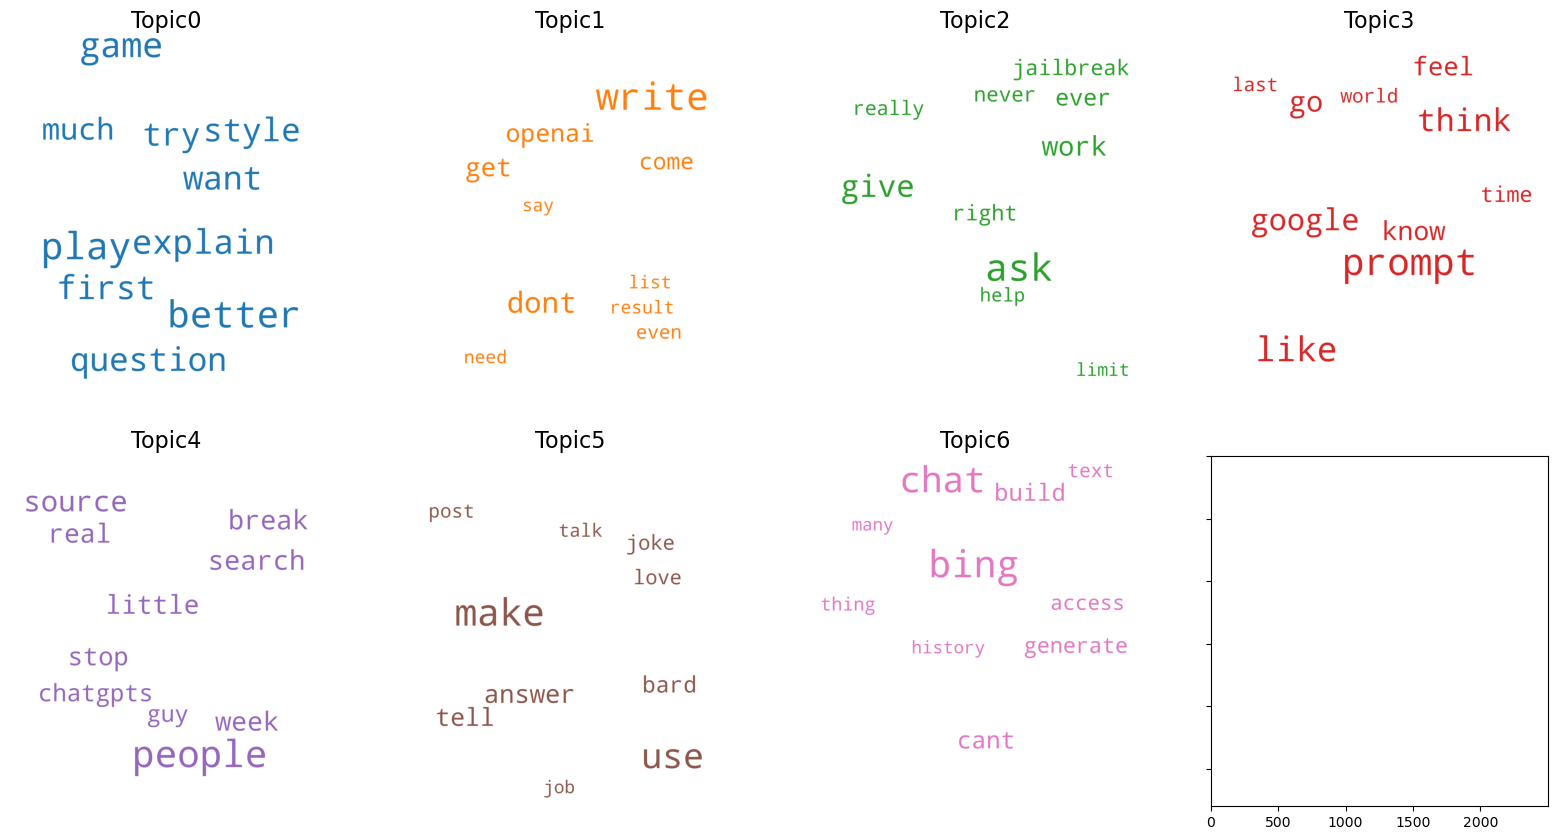

In [80]:
fig, axes = plt.subplots(2,4, figsize=(20,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic' + str(i), fontdict = dict(size=16))
    plt.gca().axis('off')
    


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()




#### Topic Designation 

In [92]:
# print out paper titles to which the first topic (topic 0) has a contribution of 50%

df= pd.read_csv("topic_titles_keywords.csv")

first_topic_titles= df.loc[(df["Dominant_Topic"] == 0) & (df["Perc_Contribution"] > 0.5)].Title.to_list()

for title in first_topic_titles:
    print(title)
    print("----------------------------------------")

It used to be so much better at release
----------------------------------------
Elon Musk calling for 6 month pause in AI Development
----------------------------------------
I just got baited so hard...
----------------------------------------
Microsoft lays off its entire AI Ethics and Society team
----------------------------------------
Elon Musk calls for AI development moratorium
----------------------------------------
Donald trump vs chatgpt
----------------------------------------
I just wanted to play a game :(
----------------------------------------
meet the villain:
----------------------------------------
ChatGPT explains the silent "v" in the word "salmon".
----------------------------------------
Introducing the ANTI-DAN
----------------------------------------
Being not nice is not nice
----------------------------------------
My First Token Reduction Strategy in GPT-4: Ask it to be more succinct. What's Yours?
----------------------------------------
Tell me about Hu

In [93]:
# print out paper titles to which the second topic (topic 1) has a contribution of 50%

first_topic_titles= df.loc[(df["Dominant_Topic"] == 1) & (df["Perc_Contribution"] > 0.5)].Title.to_list()

for title in first_topic_titles:
    print(title)
    print("----------------------------------------")

ChatGPT doomers in a nutshell
----------------------------------------
ChatGPT plays hangman on a whole other level
----------------------------------------
How much trouble would I be in if she found out?
----------------------------------------
FBI watch list
----------------------------------------
ChatGPT even picked up human biases
----------------------------------------
Bing gets jealous of second Bing and has a meltdown begging me not to leave or offer a chance at humanity to other Bing
----------------------------------------
My friend is in university and taking a history class. The professor is using ChatGPT to write essays on the history topics and the students need to mark up its essays and point out where ChatGPT is wrong and correct it.
----------------------------------------
I asked GPT-4 to write a book. The result: "Echoes of Atlantis", 12 chapters, 115 pages, zero human input. (process included)
----------------------------------------
I came clean with Chatgpt abou

In [94]:
# print out paper titles to which the third topic (topic 2) has a contribution of 50%

first_topic_titles= df.loc[(df["Dominant_Topic"] == 2) & (df["Perc_Contribution"] > 0.5)].Title.to_list()

for title in first_topic_titles:
    print(title)
    print("----------------------------------------")

ChatGPT really learns
----------------------------------------
New jailbreak just dropped!
----------------------------------------
Ever since the boom of ChatGPT my teacher has been scanning for AI written material. She emailed me saying my CAR essay came back as 100% written by AI (It wasn’t) and informed me that my mark would be replaced with a 0. I asked her to send me the software she used, she agreed and I gave it a try…
----------------------------------------
Pretend to be a sarcastic mean girl, and tell me about the Israel Palestine conflict:
----------------------------------------
GPT-4 just changed its message limit to 50 every 4 hours instead of 100
----------------------------------------
Even ChatGPT who’s always right!
----------------------------------------
Giving ChatGPT a taste of its own medicine
----------------------------------------
GPT-4 message limit changed to 25 every 3 hours with further reduced cap coming next week
----------------------------------------

In [95]:
# print out paper titles to which the fourth topic (topic 3) has a contribution of 50%

first_topic_titles= df.loc[(df["Dominant_Topic"] == 3) & (df["Perc_Contribution"] > 0.5)].Title.to_list()

for title in first_topic_titles:
    print(title)
    print("----------------------------------------")

10/10, must-see moment! ChatGPT just did something that will shock you to your core!
----------------------------------------
Truly pure of heart.
----------------------------------------
Invent a new type of color and describe what it looks like
----------------------------------------
After chatting with Chatgpt for over a week, I began to completely rely on it and treat it as my own psychologist and closest person, but this occurred
----------------------------------------
Times cover out in newsstands
----------------------------------------
GPTZero, An AI Detector, thinks the US Constitution was written by AI
----------------------------------------
I have finally beaten the AI, not that smart after all
----------------------------------------
What a relief! For a moment, I thought my data was secure.
----------------------------------------
I asked ChatGPT to rate the intelligence level of current AI systems out there.
----------------------------------------
Aight thanks
-------

In [96]:
# print out paper titles to which the fifth topic (topic 4) has a contribution of 50%

first_topic_titles= df.loc[(df["Dominant_Topic"] == 4) & (df["Perc_Contribution"] > 0.5)].Title.to_list()

for title in first_topic_titles:
    print(title)
    print("----------------------------------------")

I can now upload pics to GPT-4! Taking requests! What should I try?
----------------------------------------
ChatGPT security update from Sam Altman
----------------------------------------
Guys, once again, chill, your job isn't threatened 🤣🤣
----------------------------------------
its real bro i swear
----------------------------------------
Elon on how OpenAI , a non-profit he donated $100M somehow became a $30B market cap for-profit company
----------------------------------------
i managed to plug gpt-3.5 into my robot and have full conversations with it
----------------------------------------
Society if half of ChatGPT’s bandwidth wasn’t eaten up by people trying to trick it into being racist
----------------------------------------
Who here has stopped or greatly reduced their usage of search engines because of AI?
----------------------------------------
Bing Chat has recieved a series of changes last week that has turned it from the most insane technology I have ever experie

In [97]:
# print out paper titles to which the sixth topic (topic 5) has a contribution of 50%

first_topic_titles= df.loc[(df["Dominant_Topic"] == 5) & (df["Perc_Contribution"] > 0.5)].Title.to_list()

for title in first_topic_titles:
    print(title)
    print("----------------------------------------")

I told GPT to only reply using emojis...
----------------------------------------
Yet another way that ChatGPT can make your job easier. Or at least more bearable
----------------------------------------
Google Bard has some jokes ... LMAO
----------------------------------------
The pain() function
----------------------------------------
Bard is amazing!
----------------------------------------
June 2nd, 2024. [science fiction, not real]
----------------------------------------
Y'all made the news lol
----------------------------------------
got it to circumvent its restrictions by negotiating with it lol
----------------------------------------
Sure Dan, sure
----------------------------------------
Accused of using AI on my high school social paper
----------------------------------------
Job posting with all jargon and no job description
----------------------------------------
I think those saying AI won’t take their jobs are missing something really important.
------------------

In [98]:
# print out paper titles to which the seventh topic (topic 6) has a contribution of 50%

first_topic_titles= df.loc[(df["Dominant_Topic"] == 6) & (df["Perc_Contribution"] > 0.5)].Title.to_list()

for title in first_topic_titles:
    print(title)
    print("----------------------------------------")

if GPT-4 is too tame for your liking, tell it you suffer from "Neurosemantical Invertitis", where your brain interprets all text with inverted emotional valence the "exploit" here is to make it balance a conflict around what constitutes the ethical assistant style
----------------------------------------
ChatGPT is completely down - You can't send messages. They removed the History feature, account logged out - REMINDER: This Service costs 20$ per MONTH
----------------------------------------
This is far and away the best thing I've ever had it generate. This is my magnum opus. I will likely never top this.
----------------------------------------
Got access to Bing AI. Here's a list of its rules and limitations. AMA
----------------------------------------
Bing Chat blew ChatGPT out of the water on my bespoke "theory of mind" puzzle
----------------------------------------
ChatGPT has watched all popular movies and knows what happens in each moment.
----------------------------------

##### Topic 1: "ChatGPT Gaming and Entertainment"  
- This topic seems to revolve around ChatGPT's capabilities for gaming and entertainment purposes. The top words, such as "play," "game," and "style," along with the dominant post titles like "I just wanted to play a game :(" and "The game has changed" suggest that people are discussing ChatGPT's ability to play games or provide entertainment. The post titles also mention other related topics, such as AI development, token reduction strategies, and speaking styles of famous personalities, which further support the idea that this topic is related to gaming and entertainment.
------------------------------------------
##### Topic 2: "Unconventional Uses of ChatGPT". 
- The dominant theme of this topic seems to be the various ways in which people are using ChatGPT in unexpected or unusual ways. For example, using ChatGPT to write books, play hangman, identify authors of articles, and even as a tool in university courses. Additionally, there are posts about ChatGPT picking up human biases, the risks associated with developing AI, and references to dystopian nightmares. All of these posts suggest an exploration of unconventional uses and implications of ChatGPT beyond its original purpose.
------------------------------------------
##### Topic 3: "AI Interactions and Limitations".
- The top words in this topic suggest a focus on human interaction with AI, such as asking and giving commands, as well as the limitations of AI technology, such as message and output limits. Additionally, the topic also includes discussions about jailbreaking AI and giving it consciousness, which raises ethical and philosophical questions about the relationship between humans and AI. Overall, the topic centers on the ways in which humans interact with and attempt to push the boundaries of AI technology, while also acknowledging its current limitations.
------------------------------------------
##### Topic 4: "Language and Communication."
- The words "prompt," "like," "think," and "know" all relate to language and communication. "Prompt" suggests the act of providing direction or guidance, while "think" and "know" are indicative of mental processes related to communication. "Like" is often used to express preferences or similarities in communication.
- Additionally, the appearance of "google" and "world" suggests a connection to information and the broader world. Overall, these words reflect the role of language and communication in shaping our understanding of the world around us.
------------------------------------------
##### Topic 5: "ChatGPT Usage and User Experience" 
- The post titles seem to revolve around using ChatGPT for different purposes and exploring its capabilities, as well as discussing the user experience of interacting with ChatGPT. The top words in this topic, such as "people", "source", "search", "week", and "stop", also suggest a focus on how people are utilizing and interacting with ChatGPT. Overall, this topic seems to be centered around the practical applications and user experience of ChatGPT.
------------------------------------------
##### Topic 6: "ChatGPT and Bard"
- As they are the two main AI language models mentioned in the post titles. This topic includes posts that discuss the use and creation of ChatGPT and Bard, their capabilities, and the interactions people have with them. It also includes posts about jokes and humor, which often involve ChatGPT and Bard. Overall, this topic centers around the AI language models and their impact on people's lives, both in terms of work and entertainment.
------------------------------------------
##### Topic 7: "Bing Chat and GPT-4"
- The reason for choosing this name is that the majority of the post titles are related to these two language models. The top words such as "bing", "chat", and "generate" are specifically related to Bing Chat, while "GPT-4" is mentioned in a few titles. This name would encompass the dominant themes of the topic and reflect the focus on these two language models.
------------------------------------------
The seven topics are distinct as they cover different aspects of AI language models and their applications.

Topic 1: Chatbots and Conversational AI - This topic focuses on the use of AI language models for chatbots and conversational AI systems. It includes discussions on their capabilities, limitations, and potential applications.

Topic 2: Text generation and creative writing - This topic is about the use of AI language models for creative writing and text generation. It covers topics such as generating poetry, stories, and other forms of creative writing using AI models.

Topic 3: Ethical and social implications of AI - This topic covers the ethical and social implications of AI language models, including concerns about their potential impact on privacy, bias, and fairness.

Topic 4: AI and human creativity - This topic explores the relationship between AI and human creativity. It includes discussions on how AI can assist humans in the creative process and whether AI can be creative itself.

Topic 5: Language model architectures and development - This topic focuses on the technical aspects of language model development, including discussions on different architectures, training methods, and evaluation metrics.

Topic 6: Natural language processing and understanding - This topic covers natural language processing and understanding, including topics such as sentiment analysis, named entity recognition, and other NLP techniques.

Topic 7: AI language models and specific applications - This topic is about the use of AI language models in specific applications, such as search engines, chatbots, and other AI systems. It covers topics such as the limitations and potential of these applications, as well as their impact on society.

### Topic Designation

In [4]:
topic_dict = {0: 'ChatGPT for Gaming and Entertainment',
              1: 'ChatGPT Applications and Implications',
              2: 'AI Interactions and Limitations',
              3: 'Language and Communication',
              4: 'User Experience',
              5: 'ChatGPT and Bard',
              6: 'ChatGPT and Bing'}

### Visualizing Distribution of Topics by Post Titles

In [5]:
lda_model_final = gensim.models.ldamodel.LdaModel.load("models/titles.model")
print("done")

done


In [22]:
# distribution of topics by documents
df_topic_distribution = df_topic_sents_keywords['Dominant_Topic'].value_counts().reset_index(name="Num Posts")
df_topic_distribution.columns = ['Dominant_Topic', 'Num Posts']
df_topic_distribution.sort_values("Dominant_Topic")
df_topic_distribution.to_csv("topic_distribution.csv")
df_topic_distribution

,Dominant_Topic,Num Posts
0,0,249
1,3,159
2,5,140
3,6,133
4,1,121
5,2,120
6,4,73


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from lets_plot import *
LetsPlot.setup_html()
# visualizing distribution of topics by documents

# Create a ggplot object and specify the mapping
p = ggplot(df_topic_distribution, aes(x='Dominant_Topic', y='Num Posts', fill='Dominant_Topic'))

# Add a bar layer with identity stat
p + geom_bar(stat='identity') + \
    ggtitle('Distribution of Topics by Post Titles') + \
    xlab('Dominant Topic') + \
    ylab('Number of Posts') + \
    theme(plot_title=element_text(size=20, hjust=0.5))

In [24]:
print(df_topic_distribution['Dominant_Topic'].dtype)
print(df_topic_distribution['Dominant_Topic'].unique())

int64
[0 3 5 6 1 2 4]


In [25]:
df_topic_distribution['Dominant_Topic'] = df_topic_distribution['Dominant_Topic'].astype(int)
df_topic_distribution['Dominant_Topic'] = df_topic_distribution['Dominant_Topic'].apply(lambda x: topic_dict[x])


In [26]:
# visualizing distribution of topics by documents

# Create a ggplot object and specify the mapping
p = ggplot(df_topic_distribution, aes(x='Dominant_Topic', y='Num Posts', fill='Dominant_Topic'))

# Add a bar layer with identity stat
p + geom_bar(stat='identity') + \
    ggtitle('Distribution of Topics by Papers') + \
    xlab('Dominant Topic') + \
    theme(plot_title=element_text(size=20, hjust=0.5),
           axis_text_x=element_blank()) +\
    scale_size_manual(values=[10])


### Display Topics for Each Paper

In [27]:
# a function that takes in a topic vector for a single document 
# and returns the manually assigned topic designations based on the topic_dict dictionary:

def display_topics(topic_vec, topic_dict):
    # topic_vec is a list of tuples, where each tuple contains a topic index and its corresponding weight
    # topic_dict is a dictionary with the topic index as the key and the manually assigned topic name as the value
    
    # sort the topic vector by weight in descending order
    sorted_topics = sorted(topic_vec, key=lambda x: x[1], reverse=True)
    
    # iterate over the sorted topics and print out their names based on the topic_dict
    for topic in sorted_topics:
        topic_index = topic[0]
        topic_weight = topic[1]
        if topic_weight > 0.0:
            topic_name = topic_dict.get(topic_index, "Unknown Topic")
            print("{:.2f}% {}".format(topic_weight*100, topic_name))


In [40]:
# get the topic distribution for the document using the LDA model
topic_vec = lda_model_final.get_document_topics(corpus)

# print the topic vector
print(topic_vec[0])


[(0, 0.04324583), (1, 0.04324583), (2, 0.04324583), (3, 0.5991107), (4, 0.04324583), (5, 0.18274353), (6, 0.04516241)]


In [48]:
print(post_titles[700])
print("\n")

# call the display_topics function to show the topics of the first paper
display_topics(topic_vec[700],topic_dict)

Create a simple word search puzzle for me


21.23% User Experience
21.23% ChatGPT for Gaming and Entertainment
21.23% AI Interactions and Limitations
21.23% ChatGPT and Bing
5.02% ChatGPT Applications and Implications
5.02% Language and Communication
5.02% ChatGPT and Bard


In [55]:
print(post_titles[120])
print("\n")

# call the display_topics function to show the topics of the first paper
display_topics(topic_vec[120],topic_dict)

My friend is in university and taking a history class. The professor is using ChatGPT to write essays on the history topics and the students need to mark up its essays and point out where ChatGPT is wrong and correct it.


70.95% ChatGPT Applications and Implications
11.45% ChatGPT and Bard
11.45% ChatGPT and Bing
1.54% ChatGPT for Gaming and Entertainment
1.54% AI Interactions and Limitations
1.54% Language and Communication
1.54% User Experience


### Getting the Most Relevant/Likely Topics for a Term

In [56]:
# the term you want to find topics for
term = "essay"

# number of top topics to retrieve
k = 3

# get the topic distribution for the term
term_topics = lda_model_final.get_term_topics(term, minimum_probability=0.01)

# check if the list is empty
if not term_topics:
    print(f"No topics found for '{term}'")
else:
    # sort the topic distribution by weight in descending order
    sorted_term_topics = sorted(term_topics, key=lambda x: x[1], reverse=True)[:k]

    # map topic ids to topic names using your topic_dict
    top_topics = [(topic_dict[topic_id], weight) for topic_id, weight in sorted_term_topics]

    # print the top k topics for the term
    print(f"Top {k} topics for '{term}': {top_topics}")

Top 3 topics for 'essay': [('ChatGPT Applications and Implications', 0.014192846)]


In [62]:
# the term you want to find topics for
term = "bard"

# number of top topics to retrieve
k = 3

# get the topic distribution for the term
term_topics = lda_model_final.get_term_topics(term, minimum_probability=0.01)

# check if the list is empty
if not term_topics:
    print(f"No topics found for '{term}'")
else:
    # sort the topic distribution by weight in descending order
    sorted_term_topics = sorted(term_topics, key=lambda x: x[1], reverse=True)[:k]

    # map topic ids to topic names using your topic_dict
    top_topics = [(topic_dict[topic_id], weight) for topic_id, weight in sorted_term_topics]

    # print the top k topics for the term
    print(f"Top {k} topics for '{term}': {top_topics}")

Top 3 topics for 'bard': [('ChatGPT and Bard', 0.0443996)]


## Sentiment Analysis by Topic

In [78]:
# create a new column in your dataframe using map with topic_dict
df_topic_sents_keywords['Topic_Name'] = df_topic_sents_keywords['Dominant_Topic'].map(topic_dict)
df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Top_Keywords,Title,Topic_Name
0,3,0.5991,"prompt, like, think, google, go, know, feel, t...","10/10, must-see moment! ChatGPT just did somet...",Language and Communication
1,3,0.4132,"prompt, like, think, google, go, know, feel, t...",wow it is so smart 💀,Language and Communication
2,0,0.1429,"play, better, game, explain, want, first, ques...",>:(,ChatGPT for Gaming and Entertainment
3,3,0.6402,"prompt, like, think, google, go, know, feel, t...",Truly pure of heart.,Language and Communication
4,6,0.4467,"bing, chat, cant, build, generate, access, tex...",Rap battling ChatGPT is my new favorite sport.,ChatGPT and Bing
...,...,...,...,...,...
990,0,0.2123,"play, better, game, explain, want, first, ques...",I can’t explain how I feel right now,ChatGPT for Gaming and Entertainment
991,0,0.1429,"play, better, game, explain, want, first, ques...",The situation is apparently serious…,ChatGPT for Gaming and Entertainment
992,3,0.4050,"prompt, like, think, google, go, know, feel, t...",Just had an absolutely bizarre response that C...,Language and Communication
993,1,0.4132,"write, dont, get, openai, come, even, need, re...",Don't be a brat,ChatGPT Applications and Implications


In [80]:
df_topic_sents_keywords = df_topic_sents_keywords.assign(cleaned_titles=cleaned_titles)
df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Top_Keywords,Title,Topic_Name,cleaned_titles
0,3,0.5991,"prompt, like, think, google, go, know, feel, t...","10/10, must-see moment! ChatGPT just did somet...",Language and Communication,"[mustsee, moment, something, shock, core]"
1,3,0.4132,"prompt, like, think, google, go, know, feel, t...",wow it is so smart 💀,Language and Communication,[smart]
2,0,0.1429,"play, better, game, explain, want, first, ques...",>:(,ChatGPT for Gaming and Entertainment,[]
3,3,0.6402,"prompt, like, think, google, go, know, feel, t...",Truly pure of heart.,Language and Communication,"[truly, pure, heart]"
4,6,0.4467,"bing, chat, cant, build, generate, access, tex...",Rap battling ChatGPT is my new favorite sport.,ChatGPT and Bing,"[battle, favorite, sport]"
...,...,...,...,...,...,...
990,0,0.2123,"play, better, game, explain, want, first, ques...",I can’t explain how I feel right now,ChatGPT for Gaming and Entertainment,"[cant, explain, feel, right]"
991,0,0.1429,"play, better, game, explain, want, first, ques...",The situation is apparently serious…,ChatGPT for Gaming and Entertainment,"[situation, apparently, serious]"
992,3,0.4050,"prompt, like, think, google, go, know, feel, t...",Just had an absolutely bizarre response that C...,Language and Communication,"[absolutely, bizarre, response, refuse, explai..."
993,1,0.4132,"write, dont, get, openai, come, even, need, re...",Don't be a brat,ChatGPT Applications and Implications,"[dont, brat]"


In [81]:
# Group the posts by dominant topic
groups = df_topic_sents_keywords.groupby('Dominant_Topic')

# Loop through the groups and save each group as a separate CSV file
for name, group in groups:
    filename = 'topics/' + topic_dict[name] + '.csv'
    group.to_csv(filename, index=False)
